In [4]:
%cd /content/drive/MyDrive/CSE517/vlm_lexical_grounding

/content/drive/MyDrive/CSE517/vlm_lexical_grounding


## Install HuggingFace Transformer Library

In [2]:
!pip install transformers command
!pip install transformers

     |████████████████████████████████| 3.8 MB 5.0 MB/s 
     |████████████████████████████████| 895 kB 46.9 MB/s 
     |████████████████████████████████| 6.5 MB 39.6 MB/s 
     |████████████████████████████████| 596 kB 61.6 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
  Created wheel for command: filename=Command-0.1.0-py3-none-any.whl size=6413 sha256=502a0f8387b126ec408428112df62de50f2d5c678a2b524666056e72caec52fa
  Stored in directory: /root/.cache/pip/wheels/92/70/7c/aced46d2f5ef04e9dfe360f131b2ba8dacd929c131eee12b13
Successfully built command
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Download & Preprocess Data
Note: This only needs to be done once! :)

In [4]:
'''
  WikiHow
'''
import nltk
nltk.download('all')
#
# Download wikihowAll.csv from https://ucsb.app.box.com/s/ap23l8gafpezf4tq3wapr6u8241zz358
#!mkdir -p data/wikiHow
#!mv wikihowAll.csv data/wikiHow

# Preprocess WikiHow -- generate data/wikiHow/wikihowAll_clean_single.csv
#!python3 -m vlm_lexical_grounding.adj_noun_composition.wikihow_preprocess

tcmalloc: large alloc 1073741824 bytes == 0x55bb24e8e000 @  0x7f057bea42a4 0x7f056a0969a5 0x7f056a097cc1 0x7f056a09969e 0x7f056a06a50c 0x7f056a077399 0x7f056a05f97a 0x55badf8bc1cd 0x55badf9aeb3d 0x55badf930458 0x55badf92b66e 0x55badf8bdaba 0x55badf92c108 0x55badf92b02f 0x55badf8bdaba 0x55badf92c108 0x55badf8bd9da 0x55badf92beae 0x55badf92b02f 0x55badf7fceb0 0x55badf92d633 0x55badf92b66e 0x55badf8bdaba 0x55badf9302c0 0x55badf92b02f 0x55badf92ad43 0x55badf9291b0 0x55badf8bc229 0x55badf8bc120 0x55badf92ff33 0x55badf92b02f
^C


In [ ]:
'''
  MIT States
'''
#!mkdir -p data/mit_states
#!wget http://wednesday.csail.mit.edu/joseph_result/state_and_transformation/release_dataset.zip -P data/mit_states
#!unzip data/mit_states/release_dataset.zip -d /content/drive/MyDrive/CSE517/vlm_lexical_grounding/data/mit_states/

## Find Adjective-Noun Candidate Pairs

In [104]:
# Find `adjective noun` candidate pairs
!bash scripts/adj_noun_composition/general_statistics.sh

Reading data...
100% 8805/8805 [01:48<00:00, 81.44it/s]


## Precompute Noun Embeddings

In [10]:
# Precompute noun embeddings
# Available `embedder` are:
# - BERT
# - VideoBERT_randmask_text
# - VideoBERT_randmask_vt
# - VideoBERT_topmask_text
# - VideoBERT_topmask_vt
# - VisualBERT_text
# - VisualBERT_vt
!bash scripts/adj_noun_composition/get_target_embs.sh -e VisualBERT_vt

Streaming output truncated to the last 5000 lines.
[149 rows x 3 columns]
     level_0  ...                                               text
0        715  ...  [CLS] On the bright side, if that happens you ...
1       1924  ...  [CLS] Don’t use clichés and don’t try to make ...
2       9038  ...  [CLS] On the bright side they are fairly easy ...
3      12337  ...  [CLS] For example, “I’m going to the grocery s...
4      12466  ...  [CLS] , Fear, anger, pessimism and other negat...
..       ...  ...                                                ...
144   588117  ...  [CLS] , Try to look on the bright side, but wh...
145   591032  ...  [CLS] Turn your cape so that the bright side y...
146   595966  ...  [CLS] To achieve this yourself, look on the br...
147   595974  ...  [CLS] Instead, she looked at the bright side o...
148   596624  ...     [CLS] Look at the bright side of things. [SEP]

[149 rows x 3 columns]
     level_0  ...                                               text
0    

## TSNE Plot

In [11]:
!python3 -m vlm_lexical_grounding.adj_noun_composition.kmeans_clustering \
    --verbose \
    --num_runs 5 \
    --seed 1123 \
    --cluster_type "NOUN" \
    --embedder VisualBERT_vt \
    --bigram_occur_threshold 2 \
    --unique_bigram_threshold 10 \
    --sample_threshold 20 \
    --method "kmeans"

Len adj_ant df =  115
Len df =  7294
Len target df =  50
Len df_info =  42252
  0% 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
 20% 1/5 [00:11<00:44, 11.02s/it]/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
 40% 2/5 [00:21<00:32, 10.94s/it]/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization 

In [12]:
import numpy as np
import pandas as pd

results = pd.read_csv('/content/drive/MyDrive/CSE517/vlm_lexical_grounding/outputs/clustering_final/kmeans_NOUN_VisualBERT_vt_B2_U10_S20/run4_df_info.csv')
projections = np.load('/content/drive/MyDrive/CSE517/vlm_lexical_grounding/outputs/clustering_final/kmeans_NOUN_VisualBERT_vt_B2_U10_S20/run4_projections.npy')


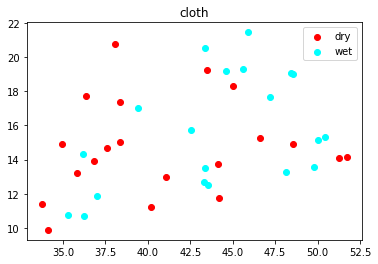

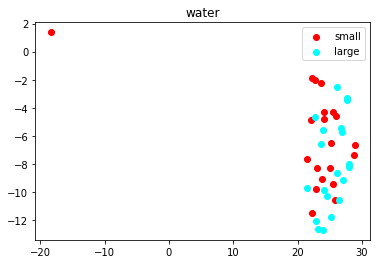

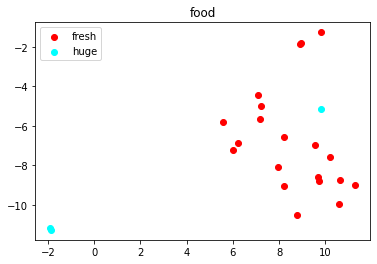

In [13]:
import matplotlib.pyplot as plt

nouns = ['cloth', 'water', 'food']
adjectives = [['dry', 'wet'], ['small', 'large'], ['fresh', 'huge']]
colors = ['red', 'aqua']

for noun, adj_arr in list(zip(nouns, adjectives)):
  plt.figure()
  noun_results = results.loc[results['noun'] == noun]
  for adj, color in list(zip(adj_arr, colors)):
    # get row id's of nouns and adjectives
    ids = noun_results.index[noun_results['adjective'] == adj].tolist()
    noun_projections = projections[ids]
    x = noun_projections[:,0]
    y = noun_projections[:,1]
    plt.scatter(x, y, color=color, label=adj)
  plt.legend()
  plt.title(noun)
  plt.show()

In [16]:
# Compute summary metrics: Homogenity, completenes, and v-measure over five runs.
results_base = '/content/drive/MyDrive/CSE517/vlm_lexical_grounding/outputs/clustering_final/kmeans_NOUN_VisualBERT_vt_B2_U10_S20/run'

h_vals, c_vals, v_vals = [], [], []
for run in range(5):
  results_path = results_base + str(run) + '_results.csv'
  results_df = pd.read_csv(results_path).iloc[0:12]
  h_vals.append(np.mean(results_df['homogeneity']))
  c_vals.append(np.mean(results_df['completeness']))
  v_vals.append(np.mean(results_df['v_measure']))

print("Averaged homogeneity = ", np.mean(h_vals), np.std(h_vals))
print("Averaged completeness = ", np.mean(c_vals), np.std(c_vals))
print("Averaged v_measure = ", np.mean(v_vals), np.std(v_vals))

Averaged homogeneity =  0.2853074186833219 0.03837473803369187
Averaged completeness =  0.30256056541494153 0.04898940299734054
Averaged v_measure =  0.2916668347413992 0.03992960726370807
